<a href="https://colab.research.google.com/github/Nitin-31121999/Forecasting/blob/main/Pandas_Case_Study_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Timestamp
pd.Timestamp("2025/1/13 8:10")

Timestamp('2025-01-13 08:10:00')

In [ ]:
pd.Timestamp(" 6th March 2025 6:10")

Timestamp('2025-03-06 06:10:00')

In [ ]:
#DatetimeIndex (Collection of multiple Timestamps)
pd.DatetimeIndex([pd.Timestamp("2025/1/12 8:10"),pd.Timestamp(" 6th March 2025 6:10")])

DatetimeIndex(['2025-01-12 08:10:00', '2025-03-06 06:10:00'], dtype='datetime64[ns]', freq=None)

In [ ]:
# to_datetime
s=pd.Series(["2025-3-23","2025-3-24"])
s

,0
0,2025-3-23
1,2025-3-24


In [ ]:
pd.to_datetime(s).dt.day_name()

,0
0,Sunday
1,Monday


In [ ]:
#create using Timestamp object
t1=pd.Timestamp("2025 March 14 1:15:59")
t2=pd.Timestamp("2025 March 18 1:15:43")
t2-t1

Timedelta('3 days 23:59:44')

In [ ]:
pd.Timedelta(weeks=3,days=2,hours=7,minutes=56,seconds=67)

Timedelta('23 days 07:57:07')

In [ ]:
# Airthematic Operations
pd.date_range(start=" 6 jan 2025",end="7 april 2025",freq="D")+pd.Timedelta(weeks=3,days=2,hours=7,minutes=56,seconds=67)

DatetimeIndex(['2025-01-29 07:57:07', '2025-01-30 07:57:07',
               '2025-01-31 07:57:07', '2025-02-01 07:57:07',
               '2025-02-02 07:57:07', '2025-02-03 07:57:07',
               '2025-02-04 07:57:07', '2025-02-05 07:57:07',
               '2025-02-06 07:57:07', '2025-02-07 07:57:07',
               '2025-02-08 07:57:07', '2025-02-09 07:57:07',
               '2025-02-10 07:57:07', '2025-02-11 07:57:07',
               '2025-02-12 07:57:07', '2025-02-13 07:57:07',
               '2025-02-14 07:57:07', '2025-02-15 07:57:07',
               '2025-02-16 07:57:07', '2025-02-17 07:57:07',
               '2025-02-18 07:57:07', '2025-02-19 07:57:07',
               '2025-02-20 07:57:07', '2025-02-21 07:57:07',
               '2025-02-22 07:57:07', '2025-02-23 07:57:07',
               '2025-02-24 07:57:07', '2025-02-25 07:57:07',
               '2025-02-26 07:57:07', '2025-02-27 07:57:07',
               '2025-02-28 07:57:07', '2025-03-01 07:57:07',
               '2025-03-

In [ ]:
df=pd.read_csv("/content/deliveries (4).csv")
df

,order_date,delivery_date
0,5/24/98,2/5/99
1,4/22/92,3/6/98
2,2/10/91,8/26/92
3,7/21/92,11/20/97
4,9/2/93,6/10/98
...,...,...
496,6/24/91,2/2/96
497,9/9/91,3/30/98
498,11/16/90,4/27/98
499,6/3/93,6/13/93


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_date     501 non-null    datetime64[ns]
 1   delivery_date  501 non-null    datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 8.0 KB


In [ ]:
df["order_date"]=pd.to_datetime(df["order_date"])
df["delivery_date"]=pd.to_datetime(df["delivery_date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_date     501 non-null    datetime64[ns]
 1   delivery_date  501 non-null    datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 8.0 KB


In [ ]:
df["delivery_time_period"]=df["delivery_date"]-df["order_date"]

In [ ]:
df.head()

,order_date,delivery_date,delivery_time_period
0,1998-05-24,1999-02-05,257 days
1,1992-04-22,1998-03-06,2144 days
2,1991-02-10,1992-08-26,563 days
3,1992-07-21,1997-11-20,1948 days
4,1993-09-02,1998-06-10,1742 days


In [ ]:
# Average mean time taken by the company to deliver the product

df["delivery_time_period"].mean()


Timedelta('1217 days 22:53:53.532934128')

In [ ]:
t=pd.read_csv("/content/titanic.csv",usecols=["Name"])
t

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [ ]:
#Working with Textual data

t["Name"].str.lower()
t['Name'].str.upper()
t["Name"].str.capitalize()
t["Name"].str.title()
t[t["Name"].str.len()==82].values

array([['Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)']],
      dtype=object)

In [ ]:
t["Name"].str.strip()  # It will remove leading and trailing spaces

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [ ]:
t["Last_Name"]=t["Name"].str.split(",").str.get(0)
t

,Name,Last_Name
0,"Braund, Mr. Owen Harris",Braund
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Cumings
2,"Heikkinen, Miss. Laina",Heikkinen
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Futrelle
4,"Allen, Mr. William Henry",Allen
...,...,...
886,"Montvila, Rev. Juozas",Montvila
887,"Graham, Miss. Margaret Edith",Graham
888,"Johnston, Miss. Catherine Helen ""Carrie""",Johnston
889,"Behr, Mr. Karl Howell",Behr


In [ ]:
t["Salutation"]=t["Name"].str.split(",").str.get(1).str.strip().str.split(" ",n=1).str.get(0)

In [ ]:
t["First_Name"]=t["Name"].str.split(",").str.get(1).str.strip().str.split(" ",n=1).str.get(1)

In [ ]:
t[["Salutation","First_Name","Last_Name"]]

,Salutation,First_Name,Last_Name
0,Mr.,Owen Harris,Braund
1,Mrs.,John Bradley (Florence Briggs Thayer),Cumings
2,Miss.,Laina,Heikkinen
3,Mrs.,Jacques Heath (Lily May Peel),Futrelle
4,Mr.,William Henry,Allen
...,...,...,...
886,Rev.,Juozas,Montvila
887,Miss.,Margaret Edith,Graham
888,Miss.,"Catherine Helen ""Carrie""",Johnston
889,Mr.,Karl Howell,Behr


In [ ]:
t.drop("Name",axis=1,inplace=True)

In [ ]:
t

,Last_Name,Salutation,First_Name
0,Braund,Mr.,Owen Harris
1,Cumings,Mrs.,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss.,Laina
3,Futrelle,Mrs.,Jacques Heath (Lily May Peel)
4,Allen,Mr.,William Henry
...,...,...,...
886,Montvila,Rev.,Juozas
887,Graham,Miss.,Margaret Edith
888,Johnston,Miss.,"Catherine Helen ""Carrie"""
889,Behr,Mr.,Karl Howell


In [ ]:
t=pd.read_csv("/content/titanic.csv",usecols=["Name"])
t

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [ ]:
t["Last_Name"]=t["Name"].str.split(",").str.get(0)
t

,Name,Last_Name
0,"Braund, Mr. Owen Harris",Braund
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Cumings
2,"Heikkinen, Miss. Laina",Heikkinen
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Futrelle
4,"Allen, Mr. William Henry",Allen
...,...,...
886,"Montvila, Rev. Juozas",Montvila
887,"Graham, Miss. Margaret Edith",Graham
888,"Johnston, Miss. Catherine Helen ""Carrie""",Johnston
889,"Behr, Mr. Karl Howell",Behr


In [ ]:
t["gender"]=t["Name"].str.strip().str.split(",").str.get(1).str.strip().str.split(" ").str.get(0)
for i in t["gender"]:
  if i=="Mr":
    t["gender"].replace(i,"Male",inplace=True)
  elif i=="Mrs":
    t["gender"].replace(i,"Female",inplace=True)

In [5]:
google=pd.read_csv("/content/google.csv")
google

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276
...,...,...,...,...,...,...,...
4466,2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100
4467,2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800
4468,2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100
4469,2022-05-19,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600


In [10]:
google["Date"]=pd.to_datetime(google["Date"])
google

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276
...,...,...,...,...,...,...,...
4466,2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100
4467,2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800
4468,2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100
4469,2022-05-19,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600


In [11]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4471 entries, 0 to 4470
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4471 non-null   datetime64[ns]
 1   Open       4471 non-null   float64       
 2   High       4471 non-null   float64       
 3   Low        4471 non-null   float64       
 4   Close      4471 non-null   float64       
 5   Adj Close  4471 non-null   float64       
 6   Volume     4471 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 244.6 KB


In [12]:
google.set_index("Date",inplace=True)

In [13]:
google.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874


In [14]:
google.loc["2004-08-20"]

,2004-08-20
Open,5.031640e+01
High,5.433633e+01
Low,5.006235e+01
Close,5.395277e+01
Adj Close,5.395277e+01
Volume,2.294287e+07


In [15]:
#partial Indexing--> For particular month/Year
google.loc["2022"]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,2889.510010,2911.000000,2870.050049,2901.489990,2901.489990,1260700
2022-01-04,2911.010010,2932.199951,2876.322998,2888.330078,2888.330078,1146400
2022-01-05,2883.620117,2885.959961,2750.469971,2753.070068,2753.070068,2482100
2022-01-06,2749.949951,2793.719971,2735.270020,2751.020020,2751.020020,1452500
2022-01-07,2758.100098,2765.094971,2715.780029,2740.090088,2740.090088,970400
...,...,...,...,...,...,...
2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100
2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800
2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100


In [18]:
google.loc["2021-12"]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-01,2884.250000,2929.982910,2830.000000,2832.360107,2832.360107,1423800
2021-12-02,2836.479980,2893.500000,2819.639893,2875.530029,2875.530029,1062500
2021-12-03,2889.909912,2904.260010,2823.000000,2850.409912,2850.409912,1334400
2021-12-06,2871.479980,2887.030029,2812.939941,2875.929932,2875.929932,1109900
2021-12-07,2919.000000,2966.000000,2914.050049,2960.729980,2960.729980,1162900
2021-12-08,2966.629883,2983.129883,2944.000000,2974.409912,2974.409912,948200
2021-12-09,2963.520020,2992.100098,2950.580078,2962.120117,2962.120117,929000
2021-12-10,2982.000000,2988.000000,2947.149902,2973.500000,2973.500000,1081700
2021-12-13,2968.879883,2971.250000,2927.199951,2934.090088,2934.090088,1205200


In [25]:
google["Month_Name"]=google.index.month_name()

In [26]:
google["Day Name"]=google.index.day_name()

In [30]:
google["Year"]=google.index.year

In [28]:
google["Quarter"]=google.index.quarter

In [31]:
google

,Open,High,Low,Close,Adj Close,Volume,Month_Name,Day Name,Date,Quarter,Year
Date,,,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August,Thursday,2004-08-19,3,2004
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,August,Friday,2004-08-20,3,2004
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,August,Monday,2004-08-23,3,2004
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808,August,Tuesday,2004-08-24,3,2004
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,August,Wednesday,2004-08-25,3,2004
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100,May,Monday,2022-05-16,2,2022
2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800,May,Tuesday,2022-05-17,2,2022
2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100,May,Wednesday,2022-05-18,2,2022


In [36]:
f=google[google["Quarter"]==1].index
f

DatetimeIndex(['2005-01-03', '2005-01-04', '2005-01-05', '2005-01-06',
               '2005-01-07', '2005-01-10', '2005-01-11', '2005-01-12',
               '2005-01-13', '2005-01-14',
               ...
               '2022-03-18', '2022-03-21', '2022-03-22', '2022-03-23',
               '2022-03-24', '2022-03-25', '2022-03-28', '2022-03-29',
               '2022-03-30', '2022-03-31'],
              dtype='datetime64[ns]', name='Date', length=1103, freq=None)

In [45]:
google.loc[f,google.columns[9]]=4
google.loc[f]

,Open,High,Low,Close,Adj Close,Volume,Month_Name,Day Name,Date,Quarter,Year
Date,,,,,,,,,,,
2005-01-03,98.331429,101.439781,97.365051,100.976517,100.976517,31807176,January,Monday,2005-01-03,4,2005
2005-01-04,100.323959,101.086105,96.378746,96.886841,96.886841,27614921,January,Tuesday,2005-01-04,4,2005
2005-01-05,96.363808,98.082359,95.756081,96.393692,96.393692,16534946,January,Wednesday,2005-01-05,4,2005
2005-01-06,97.175758,97.584229,93.509506,93.922951,93.922951,20852067,January,Thursday,2005-01-06,4,2005
2005-01-07,94.964050,96.762314,94.037521,96.563057,96.563057,19398238,January,Friday,2005-01-07,4,2005
...,...,...,...,...,...,...,...,...,...,...,...
2022-03-25,2835.080078,2839.189941,2793.989990,2830.429932,2830.429932,963500,March,Friday,2022-03-25,4,2022
2022-03-28,2813.689941,2839.530029,2796.562988,2839.000000,2839.000000,1188700,March,Monday,2022-03-28,4,2022
2022-03-29,2863.209961,2883.250000,2849.679932,2865.000000,2865.000000,1433900,March,Tuesday,2022-03-29,4,2022


In [46]:
f=google[google["Quarter"]==2].index
f

DatetimeIndex(['2005-04-01', '2005-04-04', '2005-04-05', '2005-04-06',
               '2005-04-07', '2005-04-08', '2005-04-11', '2005-04-12',
               '2005-04-13', '2005-04-14',
               ...
               '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
               '2022-05-13', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19', '2022-05-20'],
              dtype='datetime64[ns]', name='Date', length=1111, freq=None)

In [47]:
google.loc[f,google.columns[9]]=1

In [48]:
f=google[google["Quarter"]==3].index
f

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2021-09-17', '2021-09-20', '2021-09-21', '2021-09-22',
               '2021-09-23', '2021-09-24', '2021-09-27', '2021-09-28',
               '2021-09-29', '2021-09-30'],
              dtype='datetime64[ns]', name='Date', length=1113, freq=None)

In [49]:
google.loc[f,google.columns[9]]=2

In [61]:
f=google[google["Month_Name"].isin(["October","November","December"])].index
f

DatetimeIndex(['2004-10-01', '2004-10-04', '2004-10-05', '2004-10-06',
               '2004-10-07', '2004-10-08', '2004-10-11', '2004-10-12',
               '2004-10-13', '2004-10-14',
               ...
               '2021-12-17', '2021-12-20', '2021-12-21', '2021-12-22',
               '2021-12-23', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Date', length=1144, freq=None)

In [62]:
google.loc[f,google.columns[9]]=3

In [63]:
google.sample(11)

,Open,High,Low,Close,Adj Close,Volume,Month_Name,Day Name,Date,Quarter,Year
Date,,,,,,,,,,,
2006-08-24,186.520874,187.497208,185.434937,186.167206,186.167206,6991107,August,Thursday,2006-08-24,2,2006
2010-01-20,291.895905,291.895905,286.570862,289.121307,289.121307,6525769,January,Wednesday,2010-01-20,4,2010
2016-09-29,781.440002,785.799988,774.231995,775.010010,775.010010,1314700,September,Thursday,2016-09-29,2,2016
2005-09-07,142.411209,147.198257,142.107346,146.884445,146.884445,15055220,September,Wednesday,2005-09-07,2,2005
2021-09-02,2918.989990,2926.500000,2882.129883,2884.379883,2884.379883,1092200,September,Thursday,2021-09-02,2,2021
2009-12-23,300.623199,305.290710,300.299408,304.697906,304.697906,4160938,December,Wednesday,2009-12-23,3,2009
2022-02-17,2723.000000,2736.790039,2644.040039,2646.169922,2646.169922,1548400,February,Thursday,2022-02-17,4,2022
2016-05-20,701.619995,714.580017,700.520020,709.739990,709.739990,1828400,May,Friday,2016-05-20,1,2016
2007-08-27,256.254486,257.758850,254.745148,255.671677,255.671677,4667630,August,Monday,2007-08-27,2,2007


In [68]:
google["Quarter"].sample(8)

,Quarter
Date,
2021-05-20,1
2010-03-15,4
2008-01-02,4
2010-02-24,4
2011-10-31,3
2010-06-04,1
2017-01-27,4
2012-06-21,1


In [70]:
#Slicing in Timeseries Data
google.loc["2021-7-31":"2021-12-31":2]

,Open,High,Low,Close,Adj Close,Volume,Month_Name,Day Name,Date,Quarter,Year
Date,,,,,,,,,,,
2021-08-02,2709.689941,2720.409912,2693.389893,2719.790039,2719.790039,1007000,August,Monday,2021-08-02,2,2021
2021-08-04,2724.989990,2730.760010,2708.300049,2720.570068,2720.570068,826400,August,Wednesday,2021-08-04,2,2021
2021-08-06,2725.899902,2741.601074,2720.929932,2740.719971,2740.719971,678000,August,Friday,2021-08-06,2,2021
2021-08-10,2761.590088,2771.030029,2744.530029,2761.929932,2761.929932,801700,August,Tuesday,2021-08-10,2,2021
2021-08-12,2754.260010,2768.360107,2735.580078,2767.790039,2767.790039,732300,August,Thursday,2021-08-12,2,2021
2021-08-16,2760.000000,2779.810059,2723.314941,2778.320068,2778.320068,902000,August,Monday,2021-08-16,2,2021
2021-08-18,2742.310059,2765.879883,2728.419922,2731.399902,2731.399902,746700,August,Wednesday,2021-08-18,2,2021
2021-08-20,2741.659912,2772.290039,2729.340088,2768.739990,2768.739990,778200,August,Friday,2021-08-20,2,2021
2021-08-24,2830.870117,2860.149902,2827.070068,2847.969971,2847.969971,756300,August,Tuesday,2021-08-24,2,2021


In [82]:
# fetch data for particular date for every year
google[google.index.isin(pd.date_range(start="2007-1-6",end="2024-1-6",freq=pd.DateOffset(years=1)))]

,Open,High,Low,Close,Adj Close,Volume,Month_Name,Day Name,Date,Quarter,Year
Date,,,,,,,,,,,
2009-01-06,165.868286,169.763687,162.585587,166.406265,166.406265,12898566,January,Tuesday,2009-01-06,4,2009
2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987226,January,Wednesday,2010-01-06,4,2010
2011-01-06,304.199799,308.060303,303.885956,305.604523,305.604523,4131026,January,Thursday,2011-01-06,4,2011
2012-01-06,328.344299,328.767700,323.681763,323.796326,323.796326,5405987,January,Friday,2012-01-06,4,2012
2014-01-06,554.426880,557.340942,551.154114,556.573853,556.573853,3551864,January,Monday,2014-01-06,4,2014
2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899940,January,Tuesday,2015-01-06,4,2015
2016-01-06,730.000000,747.179993,728.919983,743.619995,743.619995,1947000,January,Wednesday,2016-01-06,4,2016
2017-01-06,795.260010,807.900024,792.203979,806.150024,806.150024,1640200,January,Friday,2017-01-06,4,2017
2020-01-06,1350.000000,1396.500000,1350.000000,1394.209961,1394.209961,1732300,January,Monday,2020-01-06,4,2020


<Axes: xlabel='Date'>

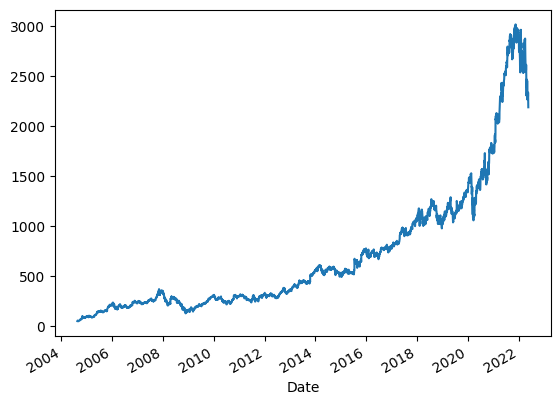

In [84]:
google["Close"].plot()

<Axes: xlabel='Date'>

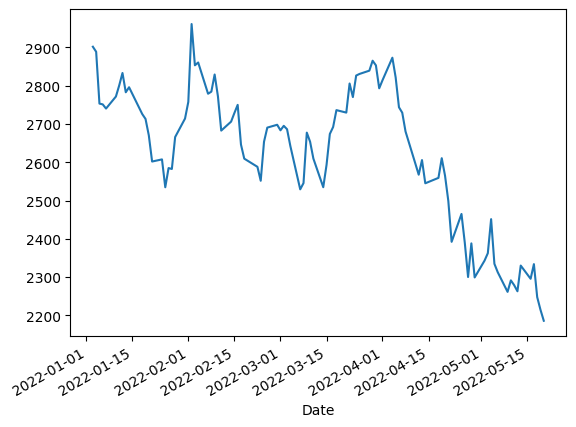

In [85]:
# plot a particular month/week/year
google["Close"]["2022"].plot()

<Axes: xlabel='Date'>

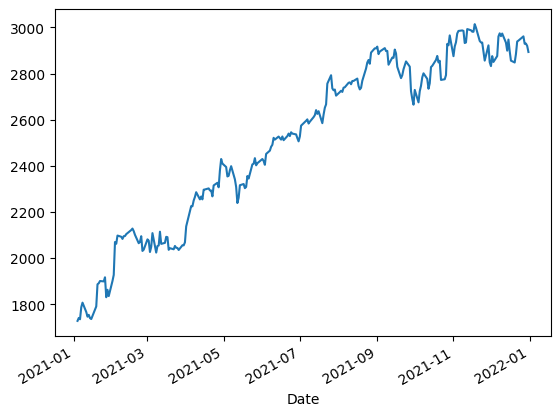

In [87]:
google.loc["2021"]["Close"].plot()

In [89]:
#Bussiness Day Data
google.asfreq("B")

,Open,High,Low,Close,Adj Close,Volume,Month_Name,Day Name,Date,Quarter,Year
Date,,,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday,2004-08-19,2.0,2004.0
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,August,Friday,2004-08-20,2.0,2004.0
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897.0,August,Monday,2004-08-23,2.0,2004.0
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808.0,August,Tuesday,2004-08-24,2.0,2004.0
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276.0,August,Wednesday,2004-08-25,2.0,2004.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100.0,May,Monday,2022-05-16,1.0,2022.0
2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800.0,May,Tuesday,2022-05-17,1.0,2022.0
2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100.0,May,Wednesday,2022-05-18,1.0,2022.0
